<a href="https://colab.research.google.com/github/Nameless8243/TensorFlow_DL/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

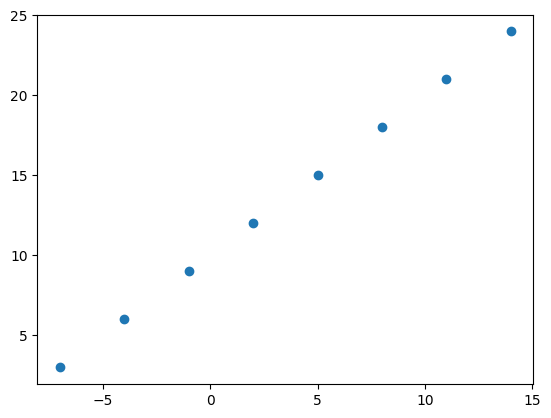

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

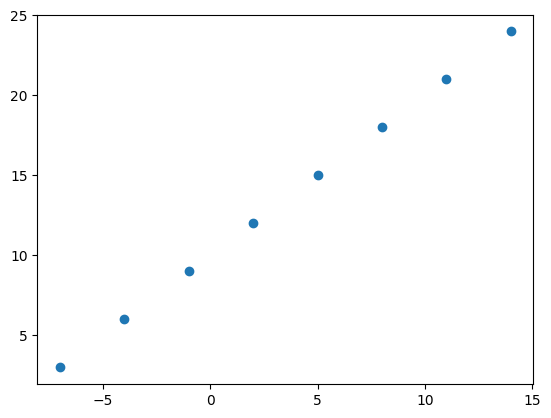

In [8]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the
function which tells our model how wrong it is) and the optimizer
(tells our model how to improve the patterns its learning) and
evaluation metrics (what we can use ta interpret the performance of our model).
3. **Fitting the model** - letting the model try to find patterns between X & y (features and labels).

In [9]:
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))

In [10]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 570ms/step - loss: 18.2198 - mae: 18.2198
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 17.4435 - mae: 17.4435
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 16.7244 - mae: 16.7244
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 16.0541 - mae: 16.0541
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 15.4248 - mae: 15.4248


In [11]:
# Check out X, and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 115ms/step


array([[-6.8963675]], dtype=float32)

In [13]:
y_pred + 18

array([[11.103632]], dtype=float32)

## Improving our model

We can improve our model, by astering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [14]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 324ms/step - loss: 8.6124 - mae: 8.6124
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 8.4799 - mae: 8.4799
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 8.3474 - mae: 8.3474
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2149 - mae: 8.2149
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.0824 - mae: 8.0824
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 7.9499 - mae: 7.9499
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8174 - mae: 7.8174
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.6849 - mae: 7.6849
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5524 - mae: 7.5524
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4325 - mae: 7.4325
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - los

In [15]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 63ms/step


array([[29.867083]], dtype=float32)

### Create a new model

In [17]:
# Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 586ms/step - loss: 13.0530 - mae: 13.0530
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.6545 - mae: 12.6545
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2301 - mae: 12.2301
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7505 - mae: 11.7505
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1705 - mae: 11.1705
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4825 - mae: 10.4825
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6407 - mae: 9.6407
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 8.5904 - mae: 8.5904
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.3587 - mae: 7.3587
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 5.7970 - mae: 5.7970
Epoch 11/100
1/1 [==============================] - 0s 10ms

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 90ms/step


array([[29.279135]], dtype=float32)

In [19]:
# Let's see if we can make another to improve our model

# Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 563ms/step - loss: 12.5114 - mae: 12.5114
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4407 - mae: 12.4407
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3701 - mae: 12.3701
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2993 - mae: 12.2993
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2285 - mae: 12.2285
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.1576 - mae: 12.1576
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 12.0866 - mae: 12.0866
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 12.0155 - mae: 12.0155
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.9444 - mae: 11.9444
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8731 - mae: 11.8731
Epoch 11/100
1/1 [==============================] - 

In [20]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 64ms/step


array([[31.261854]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

# When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [24]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

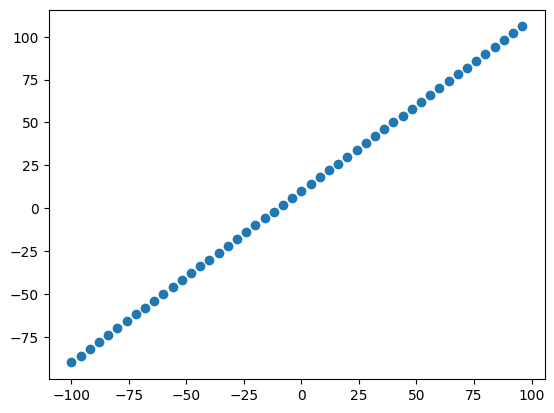

In [27]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [ ]:
### The 3 sets...